In [2]:
import pandas as pd
import numpy as np 
from datetime import datetime
from numpy.linalg import norm 

In [3]:
data = pd.read_csv("us-counties.csv")
mask_data = pd.read_csv("mask-use-by-county.csv") 

In [ ]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
data.shape

(742008, 6)

In [ ]:
data = data[(data.date >= "2020-07-10") & (data.date <= "2020-09-02")]  
data.head()       

,date,county,state,fips,cases,deaths
318754,2020-07-10,Autauga,Alabama,1001.0,670,15
318755,2020-07-10,Baldwin,Alabama,1003.0,1187,12
318756,2020-07-10,Barbour,Alabama,1005.0,381,2
318757,2020-07-10,Bibb,Alabama,1007.0,218,1
318758,2020-07-10,Blount,Alabama,1009.0,292,1


In [ ]:
data.date.max()

'2020-09-02'

In [ ]:
len(data.fips.unique()), len(mask_data.COUNTYFP.unique()) 

(3204, 3142)

In [ ]:
data_fips = set(data.fips.unique()) 
mask_fips = set(mask_data.COUNTYFP.unique()) 

In [ ]:
fips_set = data_fips.intersection(mask_fips)  

In [ ]:
len(fips_set)

3120

In [ ]:
46093 in fips_set

True

In [ ]:
data = data[data.fips.isin(fips_set)]  
mask_data = mask_data[mask_data.COUNTYFP.isin(fips_set)]    

In [ ]:
len(data.fips.unique()), len(mask_data.COUNTYFP.unique()) 

(3120, 3120)

In [46]:
days = pd.date_range(start = "2020-07-10", end = "2020-09-02") 

In [ ]:
data.head()

,date,county,state,fips,cases,deaths
318754,2020-07-10,Autauga,Alabama,1001.0,670,15
318755,2020-07-10,Baldwin,Alabama,1003.0,1187,12
318756,2020-07-10,Barbour,Alabama,1005.0,381,2
318757,2020-07-10,Bibb,Alabama,1007.0,218,1
318758,2020-07-10,Blount,Alabama,1009.0,292,1


In [ ]:
data.county += " " + data.state 

In [ ]:
len(data.county.unique())

3120

In [ ]:
data.head()

,date,county,state,fips,cases,deaths
318754,2020-07-10,Autauga Alabama,Alabama,1001.0,670,15
318755,2020-07-10,Baldwin Alabama,Alabama,1003.0,1187,12
318756,2020-07-10,Barbour Alabama,Alabama,1005.0,381,2
318757,2020-07-10,Bibb Alabama,Alabama,1007.0,218,1
318758,2020-07-10,Blount Alabama,Alabama,1009.0,292,1


In [ ]:
data.date = pd.to_datetime(data.date)  

In [ ]:
temp = data.copy()

In [ ]:
# construct one full set of dates for everyone
all_dates = pd.DataFrame(pd.date_range(temp['date'].min(), temp['date'].max()), columns=['date'])


length = temp['county'].unique().size

all_dates_full = all_dates
for x in range(length - 1):  
    all_dates_full = all_dates_full.append(all_dates) 

all_dates_full.reset_index(inplace = True, drop = True) 

# duplicate ids to match the number of dates 
length = all_dates.size
ids = temp['county'].drop_duplicates() 

ids_full = ids 
for x in range(length - 1): 
    ids_full = ids_full.append(ids) 

ids_full.sort_values(inplace = True) 
ids_full.reset_index(inplace = True, drop = True) 

# balanced_panel = pd.concat([all_dates_full, ids_full], axis = 1) 

counties = balanced_panel.county.unique()

fips = [] 
for c in counties: 
    fip = data[data.county == c].fips.values[0] 
    fips += [fip]*length

d = {"date": all_dates_full.date.tolist(), "county": ids_full.values.tolist(), "fips": fips}
balanced_panel = pd.DataFrame(data = d) 

balanced_panel 

,date,county,fips
0,2020-07-10,Abbeville South Carolina,45001.0
1,2020-07-11,Abbeville South Carolina,45001.0
2,2020-07-12,Abbeville South Carolina,45001.0
3,2020-07-13,Abbeville South Carolina,45001.0
4,2020-07-14,Abbeville South Carolina,45001.0
...,...,...,...
171595,2020-08-29,Ziebach South Dakota,46137.0
171596,2020-08-30,Ziebach South Dakota,46137.0
171597,2020-08-31,Ziebach South Dakota,46137.0
171598,2020-09-01,Ziebach South Dakota,46137.0


In [ ]:
c = "Abbeville South Carolina"
bal_c = balanced_panel[balanced_panel.county == c] 
other_c = data[data.county == c][["date", "county", "cases"]].sort_values(by = ["date"])[3: ]

In [ ]:
bal_c.merge(other_c, how = "left", on = ["date", "county"]).fillna(0).head()

,date,county,fips,cases
0,2020-07-10,Abbeville South Carolina,45001.0,0.0
1,2020-07-11,Abbeville South Carolina,45001.0,0.0
2,2020-07-12,Abbeville South Carolina,45001.0,0.0
3,2020-07-13,Abbeville South Carolina,45001.0,157.0
4,2020-07-14,Abbeville South Carolina,45001.0,162.0


In [ ]:
counties = balanced_panel.county.unique().tolist() 

c = counties[0] 

bal_c = balanced_panel[balanced_panel.county == c] 
other_c = data[data.county == c][["date", "county", "cases"]].sort_values(by = ["date"]) 

temp_df = bal_c.merge(other_c, how = "left", on = ["date", "county"]).fillna(0)

In [ ]:
temp_df.shape

(55, 4)

In [ ]:
for c in counties[1: ]: 
    temp_1 = balanced_panel[balanced_panel.county == c] 
    temp_2 = data[data.county == c][["date", "county", "cases"]].sort_values(by = ["date"]) 
    temp_df = temp_df.append(temp_1.merge(temp_2, how = "left", on = ["date", "county"]).fillna(0)) 

In [ ]:
temp_df.shape 

(171600, 4)

In [ ]:
# temp_df.to_csv("balanced_cases_data.csv")  

In [ ]:
data = pd.read_csv("balanced_cases_data.csv", index_col = 0)  

In [ ]:
data.shape

(171600, 4)

In [ ]:
data.head()

,date,county,fips,cases
0,2020-07-10,Abbeville South Carolina,45001.0,141.0
1,2020-07-11,Abbeville South Carolina,45001.0,150.0
2,2020-07-12,Abbeville South Carolina,45001.0,153.0
3,2020-07-13,Abbeville South Carolina,45001.0,157.0
4,2020-07-14,Abbeville South Carolina,45001.0,162.0


In [ ]:
# data["date"] = data["date"].astype(str) 
data["fips"] = data["fips"].astype(int)  
data["cases"] = data["cases"].astype(int)   

In [ ]:
data.dtypes

date      object
county    object
fips       int64
cases      int64
dtype: object

In [ ]:
len(data.county.unique())

3120

In [ ]:
# MASK DATA CLEANING 

In [ ]:
counties_to_drop = ["Lawrence South Dakota", 'Pennington South Dakota', "Butte South Dakota", 
                    "Campbell Wyoming", "Maricopa Arizona", "Minnehaha South Dakota", "Hennepin Minnesota",
                    "Adams Colorado", "Los Angeles California", "Cook Illinois", "Natrona Wyoming", "El Paso Colorado", 
                    "Weld Colorado", "Jefferson Colorado", "Larimer Colorado", "Harris Texas", 
                    "Douglas Nebraska", "Clark Nevada", "Anoka Minnesota", "San Diego California", "Burleigh North Dakota", 
                    "Denver Colorado", "San Bernardino California", "Polk Iowa", "Tarrant Texas", 
                    "Yellowstone Montana", "Riverside California", "Salt Lake Utah", "King Washington", "Dakota Minnesota", 
                    "Crook Wyoming", "Jackson Missouri", "Spokane Washington", "Pierce Washington", 
                    'Scotts Bluff Nebraska', "Dallas Texas", "Laramie Wyoming", "Cass North Dakota", "Boulder Colorado", 
                    "DuPage Illinois", "Woodbury Iowa", "Lincoln South Dakota", "Johnson Kansas", 
                    "Brown South Dakota", "Sheridan Wyoming", "Arapahoe Colorado", "Davison South Dakota", "Williams North Dakota", 
                    "Stark North Dakota"] 

In [ ]:
len(counties_to_drop)

49

In [ ]:
data = data[~data.county.isin(set(counties_to_drop))] 

data.shape 

(168905, 4)

In [ ]:
###### MEADE COUNTY, SD FIPS 46093 ######
mask_data.head() 

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [ ]:
meade = mask_data[mask_data.COUNTYFP == 46093]
meade

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2407,46093,0.123,0.078,0.161,0.214,0.425


In [ ]:
meade = meade.values[0][1: ] 
meade

array([0.123, 0.078, 0.161, 0.214, 0.425])

In [ ]:
norms = norm(mask_data.values[:, 1:] - meade, axis = 1) 

In [ ]:
mask_data["SIMILARITY"] = norms

In [ ]:
mask_data.sort_values(by = ["SIMILARITY"], inplace = True) 
mask_data.head() 

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,SIMILARITY
2407,46093,0.123,0.078,0.161,0.214,0.425,0.000000
2413,46103,0.127,0.078,0.159,0.222,0.414,0.014318
2401,46081,0.124,0.089,0.154,0.205,0.428,0.016155
929,20083,0.126,0.075,0.163,0.225,0.412,0.017664
1099,21213,0.137,0.066,0.162,0.208,0.426,0.019442


In [ ]:
46093 in set(data.fips.unique())

True

In [ ]:
46093 in set(mask_data.COUNTYFP.unique())

True

In [ ]:
mask_data = mask_data[mask_data.COUNTYFP.isin(set(data.fips.unique()))] 

In [ ]:
len(data.fips.unique()), len(mask_data.COUNTYFP.unique())

(3071, 3071)

In [ ]:
len(mask_data.COUNTYFP.unique())

3071

In [ ]:
len(data.fips.unique()) 

3071

In [ ]:
mask_data.shape

(3071, 7)

In [ ]:
mask_data.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,SIMILARITY
2407,46093,0.123,0.078,0.161,0.214,0.425,0.000000
929,20083,0.126,0.075,0.163,0.225,0.412,0.017664
1099,21213,0.137,0.066,0.162,0.208,0.426,0.019442
2415,46107,0.131,0.067,0.147,0.225,0.431,0.023195
519,13269,0.126,0.069,0.182,0.201,0.422,0.026627


In [ ]:
data[data.fips == 46093].county.values[0]  

'Meade South Dakota'

In [ ]:
data.head()

,date,county,fips,cases
0,2020-07-10,Abbeville South Carolina,45001,141
1,2020-07-11,Abbeville South Carolina,45001,150
2,2020-07-12,Abbeville South Carolina,45001,153
3,2020-07-13,Abbeville South Carolina,45001,157
4,2020-07-14,Abbeville South Carolina,45001,162


In [ ]:
mask_data.set_index("COUNTYFP", inplace = True)  

In [ ]:
mask_data.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,SIMILARITY
COUNTYFP,,,,,,
46093,0.123,0.078,0.161,0.214,0.425,0.000000
20083,0.126,0.075,0.163,0.225,0.412,0.017664
21213,0.137,0.066,0.162,0.208,0.426,0.019442
46107,0.131,0.067,0.147,0.225,0.431,0.023195
13269,0.126,0.069,0.182,0.201,0.422,0.026627


In [ ]:
# mask_data.to_csv("cleaned_mask_data.csv") 

In [ ]:
data.head()

,date,county,fips,cases
0,2020-07-10,Abbeville South Carolina,45001,141
1,2020-07-11,Abbeville South Carolina,45001,150
2,2020-07-12,Abbeville South Carolina,45001,153
3,2020-07-13,Abbeville South Carolina,45001,157
4,2020-07-14,Abbeville South Carolina,45001,162


In [ ]:
mask_data.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,SIMILARITY
COUNTYFP,,,,,,
46093,0.123,0.078,0.161,0.214,0.425,0.000000
20083,0.126,0.075,0.163,0.225,0.412,0.017664
21213,0.137,0.066,0.162,0.208,0.426,0.019442
46107,0.131,0.067,0.147,0.225,0.431,0.023195
13269,0.126,0.069,0.182,0.201,0.422,0.026627


In [ ]:
data.head() 

,date,county,fips,cases
0,2020-07-10,Abbeville South Carolina,45001,141
1,2020-07-11,Abbeville South Carolina,45001,150
2,2020-07-12,Abbeville South Carolina,45001,153
3,2020-07-13,Abbeville South Carolina,45001,157
4,2020-07-14,Abbeville South Carolina,45001,162


In [ ]:
# data.to_csv("cleaned_county_data_version_2.csv")  

In [ ]:
data.set_index("date", inplace = True) 
data.head() 

,county,fips,cases
date,,,
2020-07-10,Abbeville South Carolina,45001,141
2020-07-11,Abbeville South Carolina,45001,150
2020-07-12,Abbeville South Carolina,45001,153
2020-07-13,Abbeville South Carolina,45001,157
2020-07-14,Abbeville South Carolina,45001,162


In [ ]:
data.index = pd.to_datetime(data.index, format = "%Y-%m-%d") 
data.head() 

,county,fips,cases
date,,,
2020-07-10,Abbeville South Carolina,45001,141
2020-07-11,Abbeville South Carolina,45001,150
2020-07-12,Abbeville South Carolina,45001,153
2020-07-13,Abbeville South Carolina,45001,157
2020-07-14,Abbeville South Carolina,45001,162


In [ ]:
data["time_index"] = (data.index - datetime(2020, 7, 10)).days + 1

In [ ]:
data.head()

,county,fips,cases,time_index
date,,,,
2020-07-10,Abbeville South Carolina,45001,141,1
2020-07-11,Abbeville South Carolina,45001,150,2
2020-07-12,Abbeville South Carolina,45001,153,3
2020-07-13,Abbeville South Carolina,45001,157,4
2020-07-14,Abbeville South Carolina,45001,162,5


In [ ]:
data.dtypes

county        object
fips           int64
cases          int64
time_index     int64
dtype: object

In [ ]:
# data.to_csv("temp_cases.csv") 

In [ ]:
data.head() 

,county,fips,cases,time_index
date,,,,
2020-07-10,Abbeville South Carolina,45001,141,1
2020-07-11,Abbeville South Carolina,45001,150,2
2020-07-12,Abbeville South Carolina,45001,153,3
2020-07-13,Abbeville South Carolina,45001,157,4
2020-07-14,Abbeville South Carolina,45001,162,5


In [ ]:
counties = data.county.unique().tolist()

In [ ]:
mapping = {counties[i]: i+1 for i in range(len(counties))}  

In [ ]:
temp = data.copy()

In [ ]:
temp["county_num"] = temp.county.map(mapping)

In [ ]:
temp.head() 

,county,fips,cases,time_index,county_num
date,,,,,
2020-07-10,Abbeville South Carolina,45001,141,1,1
2020-07-11,Abbeville South Carolina,45001,150,2,1
2020-07-12,Abbeville South Carolina,45001,153,3,1
2020-07-13,Abbeville South Carolina,45001,157,4,1
2020-07-14,Abbeville South Carolina,45001,162,5,1


In [ ]:
temp["treatment_indicator"] = np.where(temp.county == "Meade South Dakota", 1, 0)

In [ ]:
temp[temp.county == "Meade South Dakota"].head(3)

,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
date,,,,,,,
2020-07-10,Meade South Dakota,46093,53,1,1831,1,53
2020-07-11,Meade South Dakota,46093,53,2,1831,1,53
2020-07-12,Meade South Dakota,46093,53,3,1831,1,53


In [ ]:
temp.head()

,county,fips,cases,time_index,county_num,treatment_indicator
date,,,,,,
2020-07-10,Abbeville South Carolina,45001,141,1,1,0
2020-07-11,Abbeville South Carolina,45001,150,2,1,0
2020-07-12,Abbeville South Carolina,45001,153,3,1,0
2020-07-13,Abbeville South Carolina,45001,157,4,1,0
2020-07-14,Abbeville South Carolina,45001,162,5,1,0


In [ ]:
temp["x_cases"] = temp.cases 

In [ ]:
temp.to_csv("final_cases.csv") 

In [ ]:
mask_data.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,SIMILARITY
COUNTYFP,,,,,,
46093,0.123,0.078,0.161,0.214,0.425,0.000000
20083,0.126,0.075,0.163,0.225,0.412,0.017664
21213,0.137,0.066,0.162,0.208,0.426,0.019442
46107,0.131,0.067,0.147,0.225,0.431,0.023195
13269,0.126,0.069,0.182,0.201,0.422,0.026627


In [ ]:
set(temp.fips.unique()) == set(mask_data.index.unique())

True

In [ ]:
fipz = mask_data.index.values[: 36] 

In [ ]:
top_35 = temp[temp.fips.isin(set(fipz))] 

In [ ]:
top_35.head()

,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
date,,,,,,,
2020-07-10,Albany Wyoming,56001,45,1,28,0,45
2020-07-11,Albany Wyoming,56001,49,2,28,0,49
2020-07-12,Albany Wyoming,56001,49,3,28,0,49
2020-07-13,Albany Wyoming,56001,49,4,28,0,49
2020-07-14,Albany Wyoming,56001,52,5,28,0,52


In [ ]:
top_35.shape

(1980, 7)

In [ ]:
1980/36 

55.0

In [ ]:
# top_35.to_csv("top_35_similar.csv")

In [5]:
cases = pd.read_csv("final_cases.csv")
most_similar = pd.read_csv("top_35_similar.csv") 

In [6]:
cases.head()

,date,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
0,2020-07-10,Abbeville South Carolina,45001,141,1,1,0,141
1,2020-07-11,Abbeville South Carolina,45001,150,2,1,0,150
2,2020-07-12,Abbeville South Carolina,45001,153,3,1,0,153
3,2020-07-13,Abbeville South Carolina,45001,157,4,1,0,157
4,2020-07-14,Abbeville South Carolina,45001,162,5,1,0,162


In [7]:
most_similar.head()

,date,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
0,2020-07-10,Albany Wyoming,56001,45,1,28,0,45
1,2020-07-11,Albany Wyoming,56001,49,2,28,0,49
2,2020-07-12,Albany Wyoming,56001,49,3,28,0,49
3,2020-07-13,Albany Wyoming,56001,49,4,28,0,49
4,2020-07-14,Albany Wyoming,56001,52,5,28,0,52


In [8]:
"Meade South Dakota" in most_similar.county.unique()

True

In [9]:
counties = most_similar.county.unique() 
mapping = {counties[i]: i+1 for i in range(len(counties))}  

most_similar["county_num"] = most_similar.county.map(mapping) 

most_similar.head()

,date,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
0,2020-07-10,Albany Wyoming,56001,45,1,1,0,45
1,2020-07-11,Albany Wyoming,56001,49,2,1,0,49
2,2020-07-12,Albany Wyoming,56001,49,3,1,0,49
3,2020-07-13,Albany Wyoming,56001,49,4,1,0,49
4,2020-07-14,Albany Wyoming,56001,52,5,1,0,52


In [10]:
most_similar[most_similar.county == "Meade South Dakota"].head(3)

,date,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
1100,2020-07-10,Meade South Dakota,46093,53,1,21,1,53
1101,2020-07-11,Meade South Dakota,46093,53,2,21,1,53
1102,2020-07-12,Meade South Dakota,46093,53,3,21,1,53


In [11]:
most_similar.to_csv("top_35_similar.csv") 

In [12]:
mapping

{'Albany Wyoming': 1,
 'Barnes North Dakota': 2,
 'Boone Nebraska': 3,
 'Creek Oklahoma': 4,
 'Cumberland Illinois': 5,
 'Custer South Dakota': 6,
 'Donley Texas': 7,
 'Echols Georgia': 8,
 'Fairbanks North Star Borough Alaska': 9,
 'Fayette Alabama': 10,
 'Ford Kansas': 11,
 'Gilmer West Virginia': 12,
 'Gray Texas': 13,
 'Haakon South Dakota': 14,
 'Hansford Texas': 15,
 'Harding South Dakota': 16,
 'Hodgeman Kansas': 17,
 'Hyde South Dakota': 18,
 'Laurens South Carolina': 19,
 'Lowndes Georgia': 20,
 'Meade South Dakota': 21,
 'Mississippi Missouri': 22,
 'Montgomery Georgia': 23,
 'Potter South Dakota': 24,
 'Pulaski Illinois': 25,
 'Reno Kansas': 26,
 'Rogers Oklahoma': 27,
 'Schuyler Illinois': 28,
 'Simpson Kentucky': 29,
 'Taylor Georgia': 30,
 'Telfair Georgia': 31,
 'Toombs Georgia': 32,
 'Vermillion Indiana': 33,
 'Wheeler Georgia': 34,
 'Wythe Virginia': 35,
 'Ziebach South Dakota': 36}

In [32]:
import matplotlib.pyplot as plt

In [14]:
weights = np.array([0.014701093, 0.016216236, 0.023323901 , 0.010508165, 0.015707347, 0.018144208, 0.015727017, 0.012261285, 
                    0.010395400, 0.013335404, 0.003593107, 0.018214037, 0.013065708, 0.093296610, 0.015337737, 0.270762944, 
                    0.019891413, 0.043329675, 0.006255825, 0.003004090, 0.013768470, 0.014103722, 0.160949450, 0.014309772, 
                    0.012557615, 0.008632905, 0.018086558, 0.013740612, 0.015067168, 0.012086145, 0.009325771, 0.016331361, 
                    0.014581356, 0.014416250, 0.024971644]) 

In [15]:
meade_cases = most_similar[most_similar.county == "Meade South Dakota"].cases

In [17]:
control_cases = most_similar[most_similar.county != "Meade South Dakota"].cases

In [30]:
synthetic = np.dot(control_cases.values.reshape(35, 55).T, weights) 

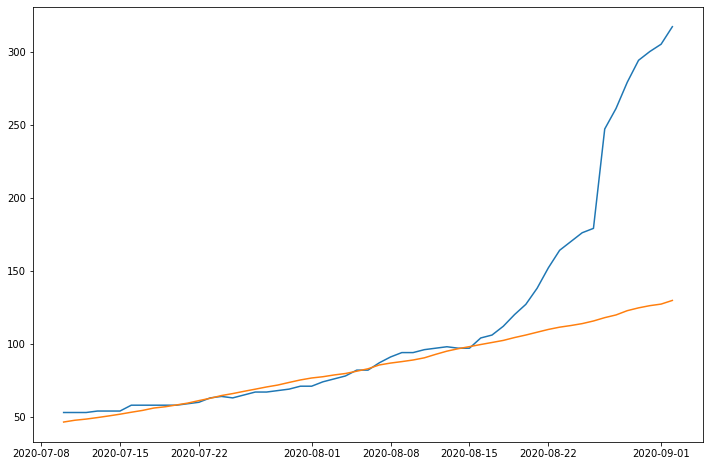

In [47]:
plt.figure(figsize = (12, 8))
plt.plot(days, meade_cases.values) 
plt.plot(days, synthetic) 

In [36]:
synthetic

array([ 46.47956429,  47.70818289,  48.49976272,  49.52956184,
        50.65577523,  51.83857683,  53.1827117 ,  54.43137615,
        56.05950492,  56.91570819,  58.14940786,  59.42456897,
        61.13411563,  62.73642092,  64.59705934,  65.95181836,
        67.49739489,  68.96715736,  70.47403239,  71.79102468,
        73.56968514,  75.27247361,  76.61684049,  77.47921106,
        78.69591629,  79.68463437,  81.26076126,  82.91444642,
        85.51919044,  86.82590957,  87.82852413,  88.92856501,
        90.41880181,  92.78777405,  94.98176284,  96.65874807,
        98.06291708,  99.52053984, 100.9127236 , 102.32522218,
       104.28973334, 106.00813453, 107.93122149, 109.84131582,
       111.3908142 , 112.51916744, 113.82390262, 115.62253638,
       117.91011304, 119.75126056, 122.68258259, 124.59895569,
       126.11088883, 127.17755176, 129.68808063])

In [38]:
meade_cases.values

array([ 53,  53,  53,  54,  54,  54,  58,  58,  58,  58,  58,  59,  60,
        63,  64,  63,  65,  67,  67,  68,  69,  71,  71,  74,  76,  78,
        82,  82,  87,  91,  94,  94,  96,  97,  98,  97,  97, 104, 106,
       112, 120, 127, 138, 152, 164, 170, 176, 179, 247, 261, 279, 294,
       300, 305, 317])

In [44]:
norm(synthetic - meade_cases.values, ord = 2)

452.33363966823083

In [48]:
temp = most_similar[most_similar.county.isin(most_similar.county.unique().tolist()[: 21])] 

In [49]:
temp.head()

,date,county,fips,cases,time_index,county_num,treatment_indicator,x_cases
0,2020-07-10,Albany Wyoming,56001,45,1,1,0,45
1,2020-07-11,Albany Wyoming,56001,49,2,1,0,49
2,2020-07-12,Albany Wyoming,56001,49,3,1,0,49
3,2020-07-13,Albany Wyoming,56001,49,4,1,0,49
4,2020-07-14,Albany Wyoming,56001,52,5,1,0,52
